# Prediction using Unsupervised ML(#Task 2)

### Deciding Optimum number of clusters using Unsupervised Learning

### Task Details: From the iris dataset predict the optimum number of clusters and represent it visually 

## Author - Gaurav Prashantrao Patil    

In [1]:
#importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [2]:
iris = pd.read_csv('iris.csv')

In [3]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### Performing Exploratory Data Analysis on the Dataset

In [4]:
#Determining different datatypes
iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [5]:
#Checking for null Values
iris.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

### Plotting different kinds of graphs to visualize the datapoints

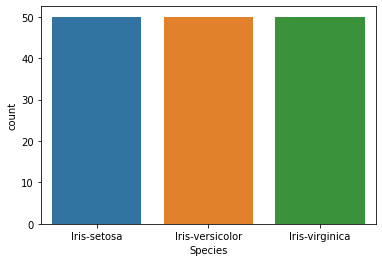

In [6]:
sns.countplot(x='Species', data=iris, )
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

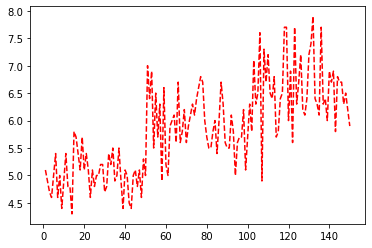

In [7]:
plt.plot(iris.Id, iris['SepalLengthCm'], 'r--')
plt.show

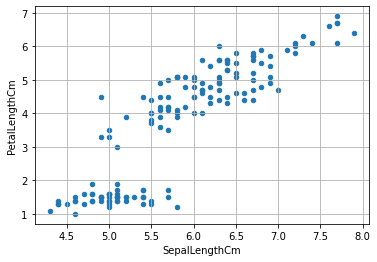

In [8]:
iris.plot(kind= "scatter",
       x = 'SepalLengthCm',
       y = 'PetalLengthCm')
plt.grid()

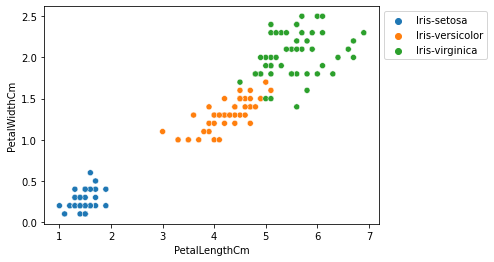

In [9]:
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm',
                hue='Species', data=iris, )

# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()


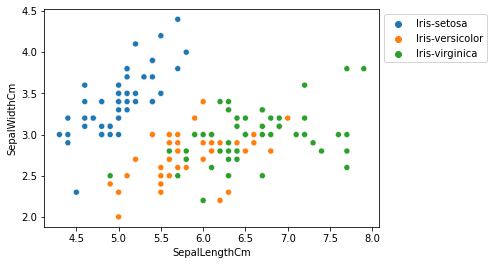

In [10]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm',
                hue='Species', data=iris, )
  
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
  
plt.show()

### From the above plot, we can infer that ; 

#### Species Setosa has smaller sepal lengths but larger sepal widths.
#### Versicolor Species lies in the middle of the other two species in terms of sepal length and width
#### Species Virginica has larger sepal lengths but smaller sepal widths.

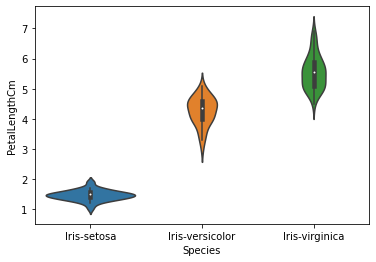

In [11]:
sns.violinplot(x="Species",y="PetalLengthCm",data=iris)
plt.show()

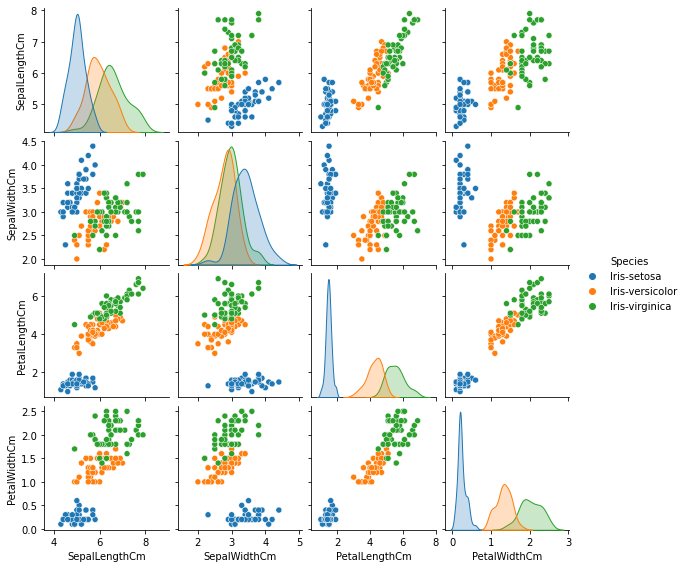

In [12]:
sns.pairplot(iris.drop(['Id'], axis = 1),
             hue='Species', height=2)


### From the above plots, we can see that ;

#### In the case of Sepal Length, there is a huge amount of overlapping.
#### In the case of Sepal Width also, there is a huge amount of overlapping.
#### In the case of Petal Length, there is a very little amount of overlapping.
#### In the case of Petal Width also, there is a very little amount of overlapping.
### So we can use Petal Length and Petal Width as the classification features.


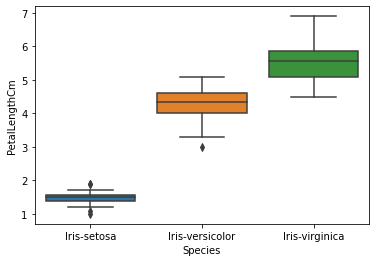

In [13]:
sns.boxplot(x = "Species", y = "PetalLengthCm", data = iris)
plt.show()

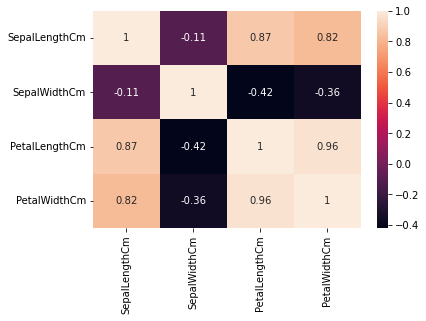

In [14]:
sns.heatmap(iris.corr(method='pearson').drop(
['Id'], axis=1).drop(['Id'], axis=0),
annot = True);

plt.show()


## From the above graph, we can see that:
####   Petal width and petal length have high correlation. 
####   Petal length and sepal width have good correlation.
####   Petal Width and Sepal length have good correlation.

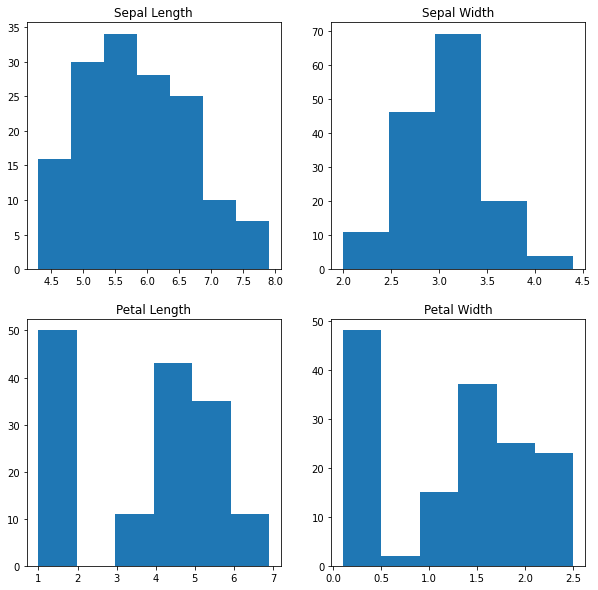

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))
  
axes[0,0].set_title("Sepal Length")
axes[0,0].hist(iris['SepalLengthCm'], bins=7)
  
axes[0,1].set_title("Sepal Width")
axes[0,1].hist(iris['SepalWidthCm'], bins=5);
  
axes[1,0].set_title("Petal Length")
axes[1,0].hist(iris['PetalLengthCm'], bins=6);
  
axes[1,1].set_title("Petal Width")
axes[1,1].hist(iris['PetalWidthCm'], bins=6);

### From the above plot, we can see that – 

####   The highest frequency of the sepal length is between 30 and 35 which is between 5.5 and 6
####   The highest frequency of the sepal Width is around 70 which is between 3.0 and 3.5
####   The highest frequency of the petal length is around 50 which is between 1 and 2
####   The highest frequency of the petal width is between 40 and 50 which is between 0.0 and 0.5

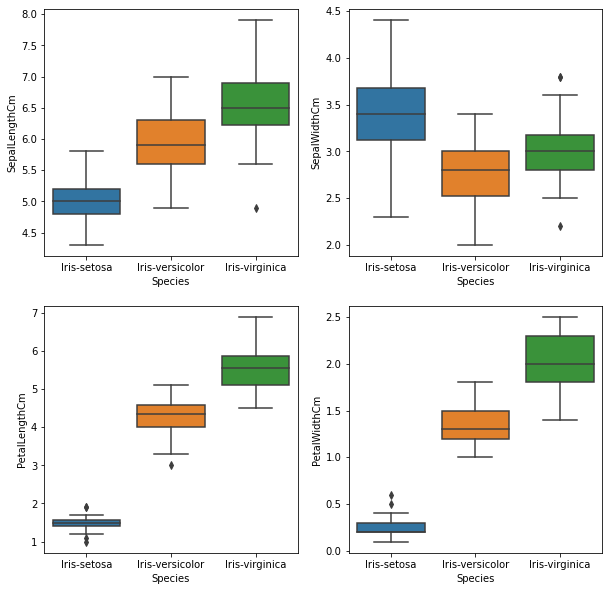

In [16]:
def graph(y):
    sns.boxplot(x="Species", y=y, data=iris)

plt.figure(figsize=(10,10))
    
# Adding the subplot at the specified
# grid position
plt.subplot(221)
graph('SepalLengthCm')

plt.subplot(222)
graph('SepalWidthCm')

plt.subplot(223)
graph('PetalLengthCm')

plt.subplot(224)
graph('PetalWidthCm')

plt.show()


### From above plot we can see that;
####   Species Setosa has the smallest features and less distributed with some outliers.
####   Species Versicolor has the average features.
####   Species Virginica has the highest features

<AxesSubplot:xlabel='SepalWidthCm'>

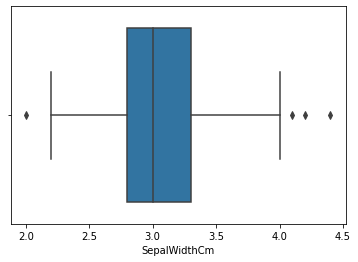

In [17]:
sns.boxplot(x='SepalWidthCm', data=iris)


### In the above plot, the values above 4 and below 2 are acting as outliers

### Removing outliers by using inter quartile range
### IQR
####    The interquartile range IQR tells us the range here the bulk of the values lie. 
####    The interquartile range is calculated by subtracting the first quartile from the third quartile. 
####    IQR = Q3 - Q1

Old Shape:  (150, 6)
New Shape:  (146, 6)


<AxesSubplot:xlabel='SepalWidthCm'>

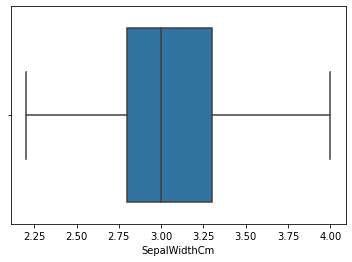

In [18]:
Q1 = np.percentile(iris['SepalWidthCm'], 25,
                interpolation = 'midpoint')
  
Q3 = np.percentile(iris['SepalWidthCm'], 75,
                interpolation = 'midpoint')
IQR = Q3 - Q1
  
print("Old Shape: ", iris.shape)
  
# Upper bound
upper = np.where(iris['SepalWidthCm'] >= (Q3+1.5*IQR))
  
# Lower bound
lower = np.where(iris['SepalWidthCm'] <= (Q1-1.5*IQR))
  
# Removing the Outliers
iris.drop(upper[0], inplace = True)
iris.drop(lower[0], inplace = True)
  
print("New Shape: ", iris.shape)
  
sns.boxplot(x='SepalWidthCm', data=iris)

### Here we can see that correlation has improved after dealing with outliers.

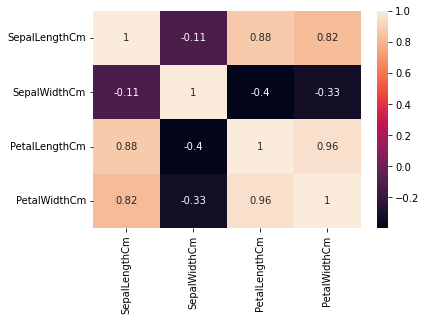

In [19]:
sns.heatmap(iris.corr(method='pearson').drop(
['Id'], axis=1).drop(['Id'], axis=0),
annot = True);

plt.show()

## Finding the optimum number of clusters for k-means clustering


In [20]:
x = iris.iloc[:, [0, 1, 2, 3]].values

### Within Cluster Sum of Squares

In [21]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### Using the elbow method to determine the optimal number of clusters for k-means clustering

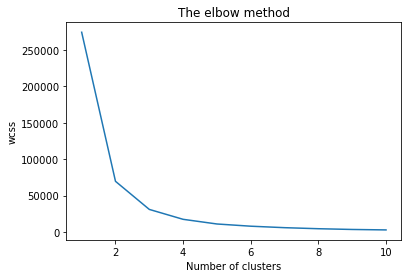

In [22]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss') #within cluster sum of squares
plt.show()

### The point of inflection in the elbow plot is 3, so we know now that the optimal number of the clusters for the data points is 3.

In [23]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)


In [24]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [25]:
km.cluster_centers_

array([[5.91639344, 2.76065574, 4.40819672, 1.44098361],
       [4.97659574, 3.36595745, 1.46382979, 0.24468085],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [26]:
iris['cluster']=y_predicted
iris.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
19,20,5.1,3.8,1.5,0.3,Iris-setosa,1
57,58,4.9,2.4,3.3,1.0,Iris-versicolor,0
64,65,5.6,2.9,3.6,1.3,Iris-versicolor,0
96,97,5.7,2.9,4.2,1.3,Iris-versicolor,0
34,35,4.9,3.1,1.5,0.1,Iris-setosa,1


### Visualising the clusters using scatter plot

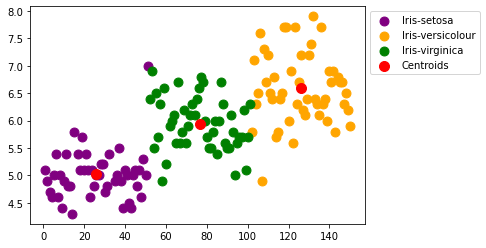

In [27]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 80, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 80, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 80, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()
plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()

### From the scatterplot we can say that  is the model’s accuracy in determining Setosa and Virginica is comparatively more to Versicolour.

#                                                      Thank You